<a href="https://colab.research.google.com/github/ShofiSabilatuss/10222145_ShofiS_AS/blob/main/10222145_ShofiSs_AS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Penjelasan Dataset yang digunakan

In [ ]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
Dataset ini berisi kumpulan komentar individu yang dikombinasikan dengan label status kesehatan mental masing-masing.
Tujuannya adalah untuk menganalisis hubungan antara ekspresi teks (komentar) dengan kondisi mental seseorang,
misalnya apakah komentar tersebut menunjukkan tanda-tanda depresi, kecemasan, stres, atau kondisi mental yang sehat.
# 2. Penjelasan setiap kolomnya
Kolom terdiri dari 3 kolom :
- id, berupa angka untuk mengidentifikasi setiap entry data.
- statement/comment, berupa teks atau komentar yang ditulis oleh individu.
- status, berupa keterangan status kesehatan mental individu.

In [ ]:
!pip install Sastrawi
!pip install nltk

# 3. Import library
import pandas as pd
import random
import numpy as np
random.seed(42)
np.random.seed(42)
import re
import string
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# 4. Load data
data = pd.read_csv('/content/Combined Data.csv', sep=',')
data = data[['statement', 'status']]
data.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


## Data Understanding

In [ ]:
# 1. Jumlah baris data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB
None


In [ ]:
# 2. Panjang rata-rata setiap baris
data['statement_length'] = data['statement'].astype(str).apply(len)
avg_length = data['statement_length'].mean()
print(f"Panjang rata-rata setiap baris (statement): {avg_length:.2f} karakter")

Panjang rata-rata setiap baris (statement): 574.78 karakter


In [ ]:
# 3. Cek data duplikasi
duplicates = data.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")
data[data.duplicated()]
data = data.drop_duplicates()

Jumlah data duplikat: 1944


In [ ]:
# 4. Cek data kosong
print(data.isnull().sum())
print((data.isnull().sum() / len(data)) * 100)
data = data.dropna()

statement           6
status              0
statement_length    0
dtype: int64
statement           0.011742
status              0.000000
statement_length    0.000000
dtype: float64


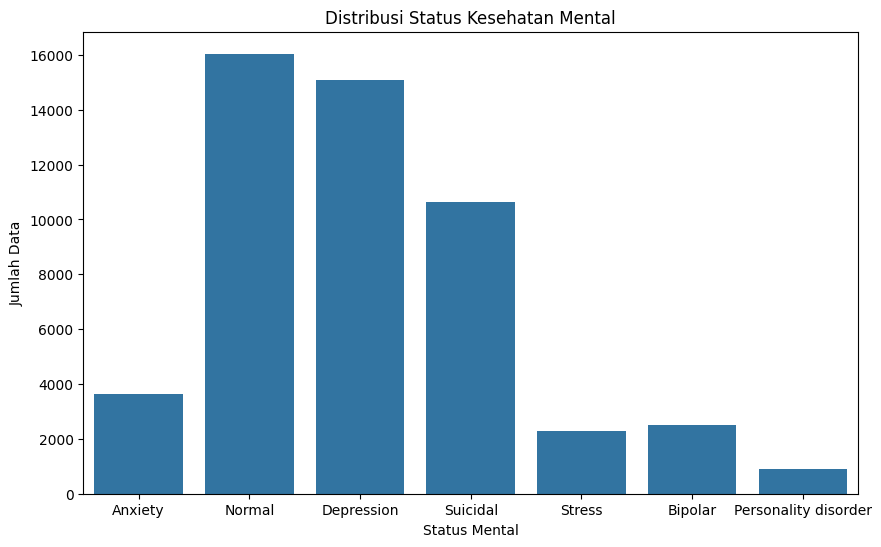

In [ ]:
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

plt.figure(figsize=(10,6))
sns.countplot(x='status', data=data)
plt.title('Distribusi Status Kesehatan Mental')
plt.xlabel('Status Mental')
plt.ylabel('Jumlah Data')
plt.show()


## Data Text Processing

In [ ]:
# 1. Tokenisasi
data['tokens'] = data['statement'].astype(str).apply(word_tokenize)
data[['statement', 'tokens']].head()

,statement,tokens
0,oh my gosh,"[oh, my, gosh]"
1,"trouble sleeping, confused mind, restless hear...","[trouble, sleeping, ,, confused, mind, ,, rest..."
2,"All wrong, back off dear, forward doubt. Stay ...","[All, wrong, ,, back, off, dear, ,, forward, d..."
3,I've shifted my focus to something else but I'...,"[I, 've, shifted, my, focus, to, something, el..."
4,"I'm restless and restless, it's been a month n...","[I, 'm, restless, and, restless, ,, it, 's, be..."


In [ ]:
# 2. Lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
data['lemmatized'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word.lower()) for word in x])
data[['tokens', 'lemmatized']].head()

,tokens,lemmatized
0,"[oh, my, gosh]","[oh, my, gosh]"
1,"[trouble, sleeping, ,, confused, mind, ,, rest...","[trouble, sleeping, ,, confused, mind, ,, rest..."
2,"[All, wrong, ,, back, off, dear, ,, forward, d...","[all, wrong, ,, back, off, dear, ,, forward, d..."
3,"[I, 've, shifted, my, focus, to, something, el...","[i, 've, shifted, my, focus, to, something, el..."
4,"[I, 'm, restless, and, restless, ,, it, 's, be...","[i, 'm, restless, and, restless, ,, it, 's, be..."


In [ ]:
# 3. Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
data['stemmed'] = data['lemmatized'].apply(lambda x: [stemmer.stem(word) for word in x])
data[['lemmatized', 'stemmed']].head()

,lemmatized,stemmed
0,"[oh, my, gosh]","[oh, my, gosh]"
1,"[trouble, sleeping, ,, confused, mind, ,, rest...","[troubl, sleep, ,, confus, mind, ,, restless, ..."
2,"[all, wrong, ,, back, off, dear, ,, forward, d...","[all, wrong, ,, back, off, dear, ,, forward, d..."
3,"[i, 've, shifted, my, focus, to, something, el...","[i, 've, shift, my, focu, to, someth, els, but..."
4,"[i, 'm, restless, and, restless, ,, it, 's, be...","[i, 'm, restless, and, restless, ,, it, 's, be..."


In [ ]:
# 4. Stopword removal (Tanda baca, angka dan kata)
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Daftar kata tidak baku, seruan, dan ekspresi informal dalam bahasa Inggris
non_standard_words = {
    "oh", "ah", "uh", "hmm", "huh", "hey", "hi", "yeah", "yep", "nope",
    "wow", "ok", "okay", "alright", "hahaha", "haha", "lol", "omg",
    "huh", "hmm", "uhh", "uhm", "huh", "yo", "hey", "oops", "woo", "hurray"
}

def clean_tokens(tokens):
    cleaned = [
        word for word in tokens
        if word.isalpha()                              # hanya huruf
        and word.lower() not in stop_words             # hapus stopword
        and word.lower() not in non_standard_words     # hapus kata tidak baku
        and word not in string.punctuation             # hapus tanda baca
    ]
    return cleaned

# Terapkan ke kolom data kamu
data['stopword'] = data['stemmed'].apply(clean_tokens)
data[['stemmed', 'stopword']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,stemmed,stopword
0,"[oh, my, gosh]",[gosh]
1,"[troubl, sleep, ,, confus, mind, ,, restless, ...","[troubl, sleep, confus, mind, restless, heart,..."
2,"[all, wrong, ,, back, off, dear, ,, forward, d...","[wrong, back, dear, forward, doubt, stay, rest..."
3,"[i, 've, shift, my, focu, to, someth, els, but...","[shift, focu, someth, els, still, worri]"
4,"[i, 'm, restless, and, restless, ,, it, 's, be...","[restless, restless, month, boy, mean]"


In [ ]:
# 5. Text Normalisasi
data['normalized'] = data['stopword'].apply(lambda x: ' '.join(x).lower())
data[['stopword', 'normalized']].head()

,stopword,normalized
0,[gosh],gosh
1,"[troubl, sleep, confus, mind, restless, heart,...",troubl sleep confus mind restless heart tune
2,"[wrong, back, dear, forward, doubt, stay, rest...",wrong back dear forward doubt stay restless re...
3,"[shift, focu, someth, els, still, worri]",shift focu someth els still worri
4,"[restless, restless, month, boy, mean]",restless restless month boy mean


In [ ]:
# 6. Matrix correlation (opsional)
data['text_length'] = data['normalized'].apply(lambda x: len(x.split()))
print("\nKorelasi antara panjang teks dan status mental:")
print(data[['text_length', 'status']].corr(numeric_only=True))


Korelasi antara panjang teks dan status mental:
             text_length
text_length          1.0


In [ ]:
# 7. Labeling Data (Lexicon-based Sentiment using VADER)
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Pastikan lexicon VADER sudah terunduh
nltk.download('vader_lexicon')

# Inisialisasi Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Fungsi untuk menghitung skor dan memberi label sentimen
def get_sentiment_score_and_label(text):
    score = sia.polarity_scores(text)['compound']
    score_int = int(round(score))

    # Gunakan skor bulat untuk menentukan label
    if score_int > 0:
        label = 'positive'
    elif score_int < 0:
        label = 'negative'
    else:
        label = 'neutral'

    return pd.Series([score_int, label])

# Terapkan fungsi pada kolom teks bersih
data[['sentiment_score', 'label']] = data['normalized'].apply(get_sentiment_score_and_label)

# Lihat hasil awal
data[['normalized', 'sentiment_score', 'label']].head(10)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,normalized,sentiment_score,label
0,gosh,0,neutral
1,troubl sleep confus mind restless heart tune,0,neutral
2,wrong back dear forward doubt stay restless re...,-1,negative
3,shift focu someth els still worri,0,neutral
4,restless restless month boy mean,0,neutral
5,everi break must nervou like someth wrong heck,0,neutral
6,feel scare anxiou may famili u protect,0,neutral
7,ever felt nervou know whi,0,neutral
8,slept well day like restless whi,0,neutral
9,realli worri want cri,0,neutral


/tmp/ipython-input-3013460186.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='viridis')


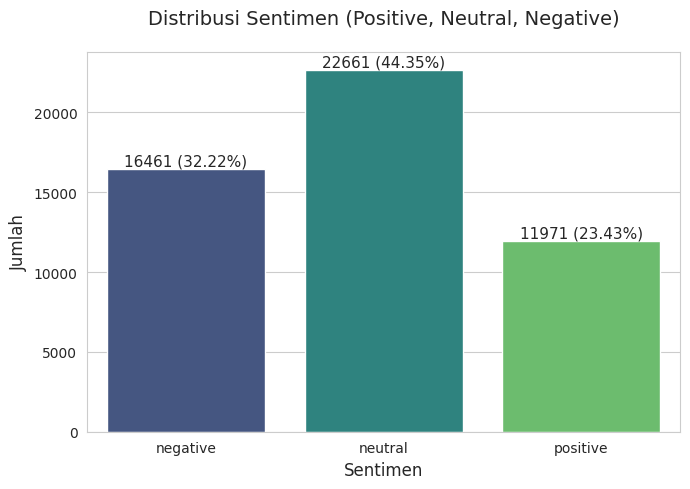

In [ ]:
# 🔹 Visualisasi Distribusi Sentimen (Positive, Neutral, Negative)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama DataFrame dan kolom sesuai dengan yang kamu pakai
sentiment_count = data['label'].value_counts().reindex(['negative', 'neutral', 'positive'], fill_value=0)

# Gaya visualisasi
sns.set_style('whitegrid')
plt.figure(figsize=(7, 5))

# Plot distribusi
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='viridis')

# Judul dan label sumbu
plt.title('Distribusi Sentimen (Positive, Neutral, Negative)', fontsize=14, pad=20)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Hitung total untuk persentase
total = sentiment_count.sum()

# Tampilkan nilai dan persentase di atas batang
for i, count in enumerate(sentiment_count.values):
    ax.text(i, count + 0.5, f'{count} ({count/total*100:.2f}%)',
            ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


In [ ]:
# 8. Text Vektorisasi
# 8. Text Vectorization (TF-IDF berdasarkan hasil labeling VADER)
from sklearn.feature_extraction.text import TfidfVectorizer

# Pastikan tidak ada nilai kosong
data = data.dropna(subset=['normalized', 'label'])

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,      # ambil maksimal 5000 fitur
    ngram_range=(1,2),      # unigram dan bigram
    stop_words='english'    # hilangkan stopword bahasa Inggris
)

# Transformasikan teks ke dalam bentuk vektor numerik
X = tfidf.fit_transform(data['normalized'])
y = data['label']

# Lihat bentuk hasil vektorisasi
print("Ukuran Matriks TF-IDF:", X.shape)
print("Contoh Label:", y.unique())


Ukuran Matriks TF-IDF: (51093, 5000)
Contoh Label: ['neutral' 'negative' 'positive']


In [ ]:
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nJumlah data train:", X_train.shape[0])
print("Jumlah data test:", X_test.shape[0])


Jumlah data train: 40874
Jumlah data test: 10219


## Data Modeling

In [ ]:
# Berikan Penjelasan tentang model yang dipilih
Support Vector Machine (SVM) adalah algoritma pembelajaran mesin supervised learning yang digunakan untuk klasifikasi dan regresi.
Konsep utamanya adalah mencari garis pemisah (hyperplane) terbaik yang dapat memisahkan data dari kelas yang berbeda dengan margin (jarak) terbesar.
Model SVM dipilih karena kemampuannya yang unggul dalam menangani data teks berdimensi tinggi dan memberikan hasil klasifikasi yang akurat serta stabil.
Dalam proyek ini, SVM membantu membedakan teks yang mengandung emosi kecemasan (Anxiety) dengan yang tidak (Normal) secara efektif.

## Data Evaluasi

In [ ]:
# Model 1: SVM Linear
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [ ]:
# 2. Laporann Klasifikasi (Classification report)print("\n📊 Classification Report - SVM Model:\n")
# ===== Evaluasi =====
from sklearn.metrics import classification_report

print("=== SVM Linear ===")
svm_report = classification_report(y_test, svm_preds, target_names=['negative', 'positive', 'neutral'], output_dict=True)
print(classification_report(y_test, svm_preds, target_names=['negative', 'positive', 'neutral']))

=== SVM Linear ===
              precision    recall  f1-score   support

    negative       0.87      0.86      0.86      3267
    positive       0.81      0.85      0.83      4553
     neutral       0.83      0.77      0.80      2399

    accuracy                           0.83     10219
   macro avg       0.84      0.82      0.83     10219
weighted avg       0.83      0.83      0.83     10219



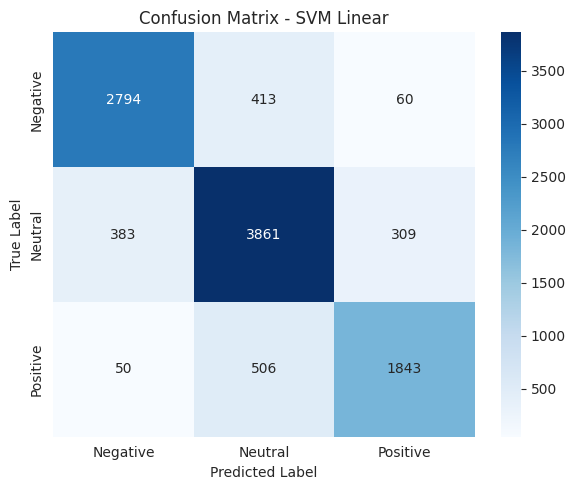

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fungsi untuk menampilkan Confusion Matrix dengan 3 kelas
def plot_confusion_matrix(y_true, y_pred, model_name):
    # Buat confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=['negative', 'neutral', 'positive'])

    # Tampilkan heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Negative', 'Neutral', 'Positive'],
        yticklabels=['Negative', 'Neutral', 'Positive']
    )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

# Contoh pemanggilan fungsi (ganti svm_preds sesuai variabel prediksi kamu)
plot_confusion_matrix(y_test, svm_preds, "SVM Linear")

## Data Prediksi

In [ ]:
#  Gunakan model yang sudah dibuat dan prediksi pada data baru

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Pastikan resource NLTK sudah tersedia
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Inisialisasi komponen preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Fungsi preprocessing untuk teks baru
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Contoh data baru
new_comments = [
    "I feel so nervous and can't sleep at night.",
    "Everything is fine, I’m really happy today!",
    "I’m constantly tired and have no motivation.",
    "Sometimes I overthink everything until I panic."
]

# --- 1️⃣ Preprocessing teks baru ---
new_comments_preprocessed = [preprocess_text(comment) for comment in new_comments]

# --- 2️⃣ Transformasi dengan TF-IDF vectorizer yang sudah dilatih ---
new_comments_vectorized = tfidf.transform(new_comments_preprocessed)

# --- 3️⃣ Prediksi dengan model SVM yang sudah dibuat ---
predicted_labels = svm_model.predict(new_comments_vectorized)

# --- 4️⃣ Tampilkan hasil prediksi ---
for comment, label in zip(new_comments, predicted_labels):
    print(f"Teks: {comment}")
    print(f"Label Sentimen: {label}")
    print("-" * 60)


Teks: I feel so nervous and can't sleep at night.
Label Sentimen: neutral
------------------------------------------------------------
Teks: Everything is fine, I’m really happy today!
Label Sentimen: neutral
------------------------------------------------------------
Teks: I’m constantly tired and have no motivation.
Label Sentimen: neutral
------------------------------------------------------------
Teks: Sometimes I overthink everything until I panic.
Label Sentimen: negative
------------------------------------------------------------


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


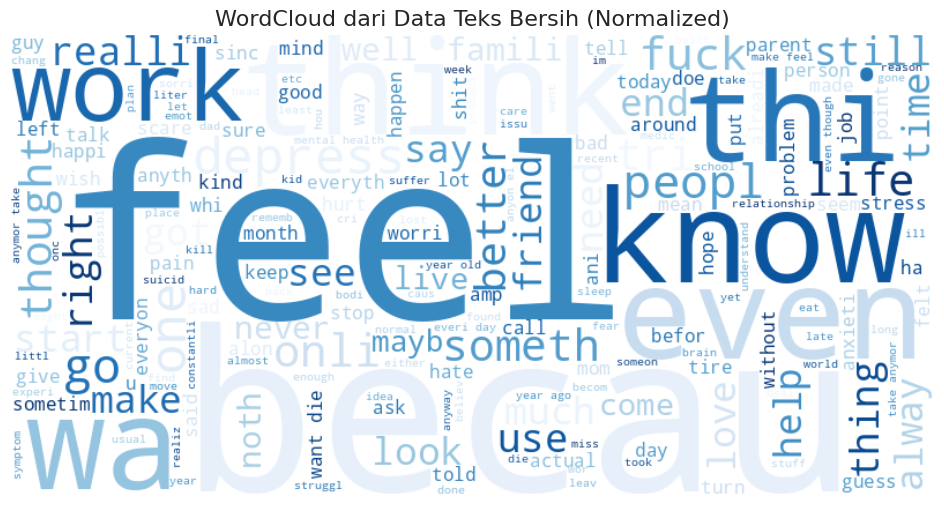

In [ ]:
# 🔹 Visualisasi WordCloud untuk data teks bersih
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks bersih menjadi satu string besar
all_text = ' '.join(data['normalized'].astype(str))

# Buat objek WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Blues',
    max_words=200,
    stopwords=None
).generate(all_text)

# Tampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud dari Data Teks Bersih (Normalized)", fontsize=16)
plt.show()


/tmp/ipython-input-2725485324.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Kata', x='Frekuensi', data=freq_df, palette='mako')


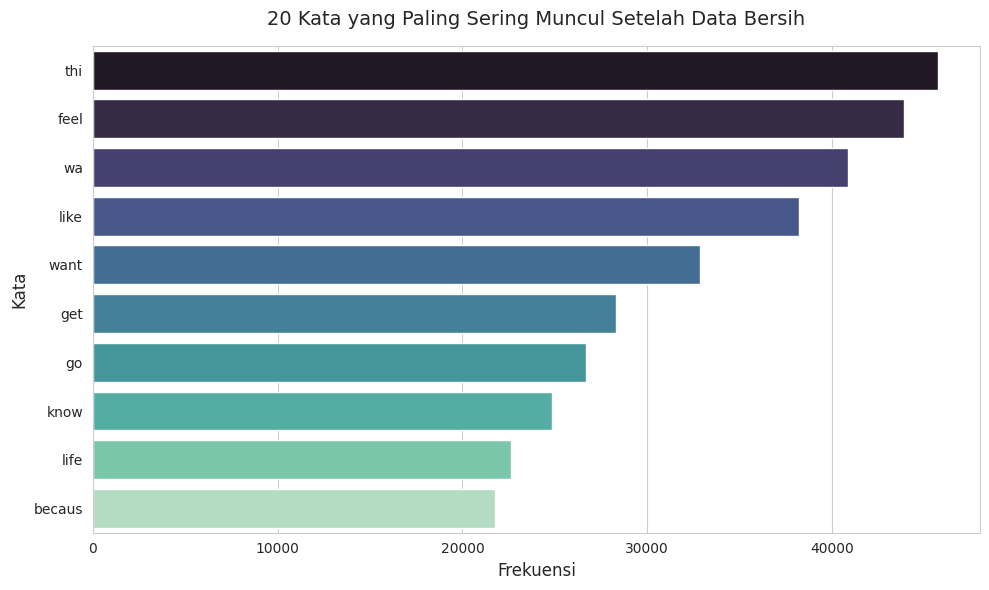

In [ ]:
#  Visualisasi kata yang paling sering muncul setelah data bersih

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Gabungkan semua teks dari kolom 'normalized'
all_words = ' '.join(data['normalized'].astype(str)).split()

# Hitung frekuensi kata
word_freq = Counter(all_words)

# Ambil 20 kata yang paling sering muncul
common_words = word_freq.most_common(10)

# Ubah ke DataFrame untuk visualisasi
freq_df = pd.DataFrame(common_words, columns=['Kata', 'Frekuensi'])

# --- Visualisasi ---
plt.figure(figsize=(10, 6))
sns.barplot(y='Kata', x='Frekuensi', data=freq_df, palette='mako')

plt.title('20 Kata yang Paling Sering Muncul Setelah Data Bersih', fontsize=14, pad=15)
plt.xlabel('Frekuensi', fontsize=12)
plt.ylabel('Kata', fontsize=12)
plt.tight_layout()
plt.show()
